# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\surajshukla\AppData\Local\Temp\ipykernel_36184\1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Loading

In [2]:
data = pd.read_csv("data.csv")

# print(df.to_string()) # print entire dataframe
print(data) # print first 5 & last 5

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

# Data Visualization

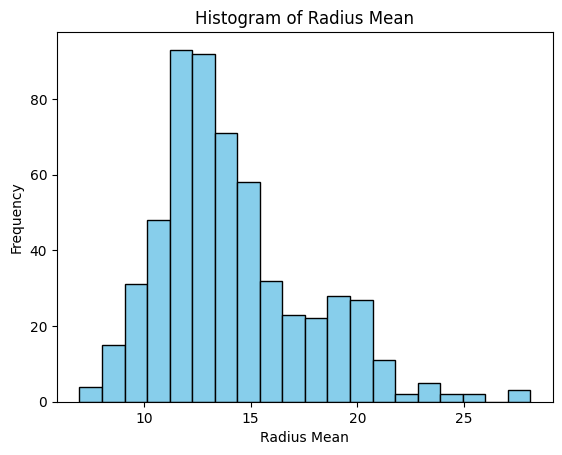

In [3]:
# Plot histogram for radius_mean
plt.hist(data['radius_mean'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Radius Mean')
plt.show()

ValueError: could not convert string to float: 'B'

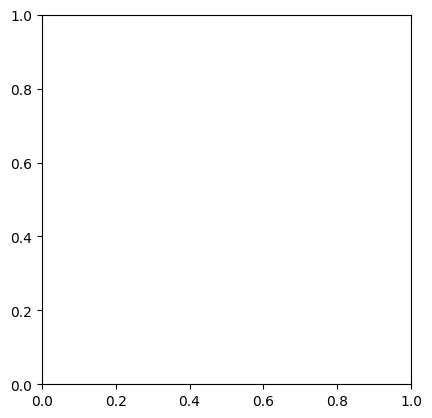

In [8]:
# Count the frequency of each diagnosis
diagnosis_counts = data['diagnosis'].value_counts()

# Plot bar chart for diagnosis frequency
plt.bar(diagnosis_counts.index, diagnosis_counts.values, color=['red', 'green'])
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.title('Bar Chart of Diagnosis Frequency')
plt.show()


In [ ]:
# Plot scatter plot for radius_mean vs. perimeter_mean
plt.scatter(data[data['diagnosis'] == 'M']['radius_mean'], data[data['diagnosis'] == 'M']['perimeter_mean'], color='red', label='Malignant')
plt.scatter(data[data['diagnosis'] == 'B']['radius_mean'], data[data['diagnosis'] == 'B']['perimeter_mean'], color='blue', label='Benign')
plt.xlabel('Radius Mean')
plt.ylabel('Perimeter Mean')
plt.title('Scatter Plot of Radius Mean vs. Perimeter Mean')
plt.legend()
plt.show()
